# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [ ]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step1. 下載資料

In [ ]:
breast_cancer=datasets.load_breast_cancer()
features=breast_cancer.data
target=breast_cancer.target
#print(breast_cancer.keys())
#print(breast_cancer.feature_names)
#print(breast_cancer.target_names)
print(features)
print(target)
print(breast_cancer.target_names)
print(breast_cancer.feature_names)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [ ]:
target_names=breast_cancer.target_names
labels=target_names[target]


In [ ]:
benign_mean_radius=features[labels=='benign',0] #mean radius
#benign_mean_textures=features[labels=='benign',1] #mean_textures
print(benign_mean_radius.shape)
#print(benign_mean_textures.shape)
benign_worst_compactness=features[labels=='benign',25]  #worst compactness
benign=np.c_[benign_mean_radius,benign_worst_compactness]
#benign=np.c_[benign_mean_textures,benign_worst_compactness]
print(benign.shape)

(357,)
(357, 2)


In [ ]:
malignant_mean_radius=features[labels=='malignant',0] #mean radius
print(malignant_mean_radius.shape)
malignant_worst_compactness=features[labels=='malignant',25]  #worst compactness
malignant=np.c_[malignant_mean_radius,malignant_worst_compactness]
print(malignant.shape)

(212,)
(212, 2)


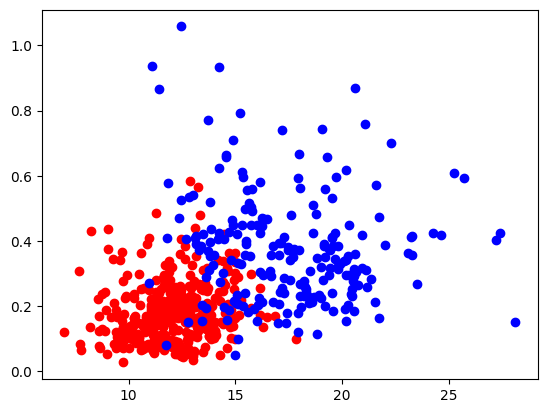

In [ ]:
plt.scatter(benign[:,0],benign[:,1],color='red')
plt.scatter(malignant[:,0],malignant[:,1],color='blue')

## Step2. 區分訓練集與測試集

In [ ]:
training_data=np.r_[benign, malignant]
training_labels=np.r_[np.zeros(len(benign)),np.ones(len(malignant))]
X_train, X_test, y_train, y_test = train_test_split(training_data, training_labels,test_size=0.3,random_state=0)

## Step3. 建模

In [ ]:
clf=svm.SVC(kernel='rbf',gamma='auto',C=10)
clf.fit(X_train,y_train)

SVC(C=10, gamma='auto')

## Step4. 預測

```

```


In [ ]:
y_hat = clf.predict(X_test)

In [ ]:
y_test

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1.])

## Step5. 準確度分析

In [ ]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.8919597989949749
0.9181286549707602


In [ ]:
count = 0
for i in range(len(y_hat)):
  if (y_test[i] != y_hat[i]) and (y_test[i]==0): # 挑選出惡性誤判的數量及引數
    count += 1
    print(i)
print(count)


0
